In [2]:
%matplotlib inline
import numpy as np
np.random.seed(1)

import tensorflow as tf
# WARNING: In TensorFlow 2.0 doesn't exist 
#tf.random.set_random_seed(2)

from tensorflow import keras
from keras import preprocessing

import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
print("tensorflow.keras version: ", keras.__version__)
print("numpy version: ", np.__version__)

TensorFlow version:  1.14.0
tensorflow.keras version:  2.2.4-tf
numpy version:  1.16.4


Using TensorFlow backend.


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

In [10]:
train_images[0].shape

(28, 28)

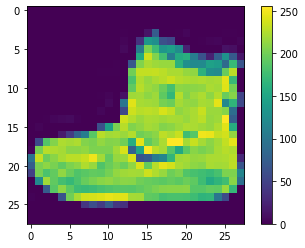

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

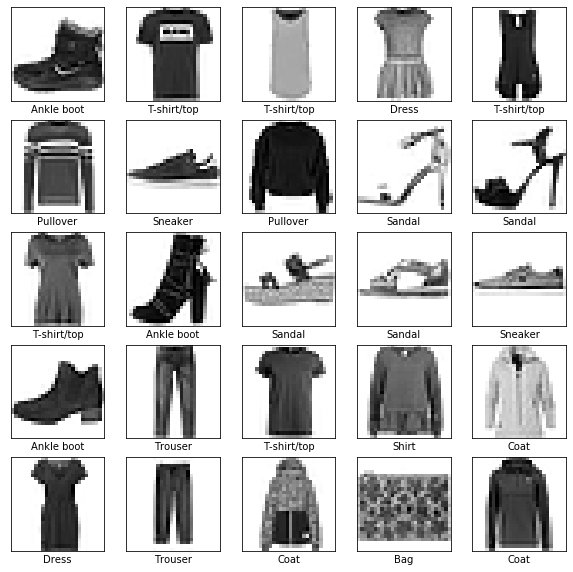

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras

input_data = keras.layers.Input(shape=[28,28])
flatten = keras.layers.Flatten()(input_data)
hidden1 = keras.layers.Dense(128, activation=tf.nn.relu)(flatten)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(hidden1)
model3 = keras.models.Model(inputs=[input_data], outputs=[output])
#model3.compile(loss="mean_squared_error", optimizer="sgd")

W0819 14:17:13.380134 140466277582656 deprecation.py:506] From /home/opc/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5016 - acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3772 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3413 - acc: 0.8751
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3156 - acc: 0.8843
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2968 - acc: 0.8918
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2840 - acc: 0.8946
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2727 - acc: 0.8989
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2599 - acc: 0.9032
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2516 - acc: 0.9066
Epoch 10/10
60000/60000 [==============================] - 5s 79us/sample - loss: 

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4970 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3721 - acc: 0.8660
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3344 - acc: 0.8779
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3083 - acc: 0.8874
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2919 - acc: 0.8925
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2774 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2667 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2553 - acc: 0.9050
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2473 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 5s 80us/sample - loss: 

In [20]:
model3.save('my_model_7.h5')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [78]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3431 - acc: 0.8804
Test accuracy: 0.8804


In [79]:
predictions = model3.predict(test_images)
predictions[0]

array([8.2986048e-07, 4.3227097e-08, 8.2970658e-08, 2.3514643e-07,
       3.3662086e-08, 1.1713797e-02, 1.1339409e-06, 5.0320357e-02,
       3.6678961e-07, 9.3796307e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [14]:
test_labels[0]

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

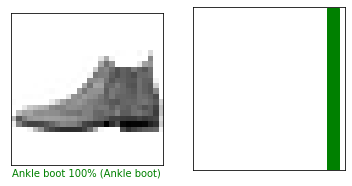

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

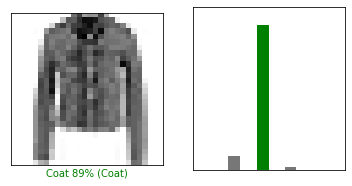

In [17]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

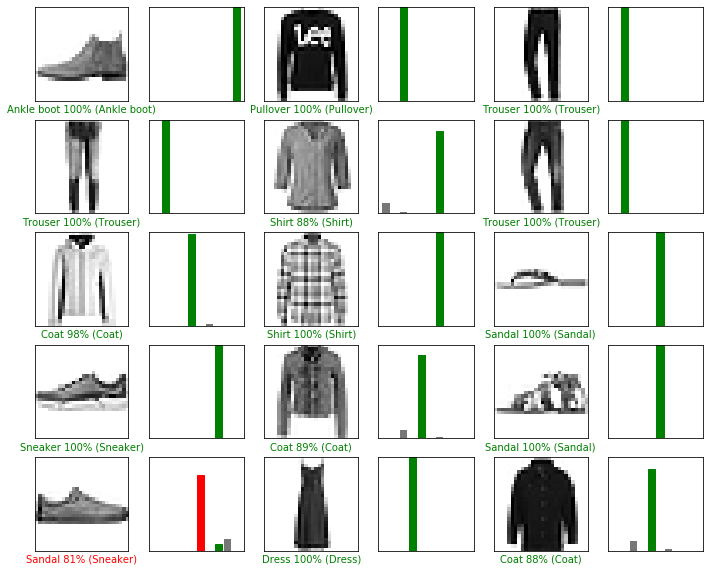

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [19]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[1.3735870e-07 6.0231775e-09 1.3699729e-10 1.1004020e-12 5.6512706e-10
  5.0427872e-05 7.8237203e-09 2.6870356e-03 1.0395076e-08 9.9726248e-01]]


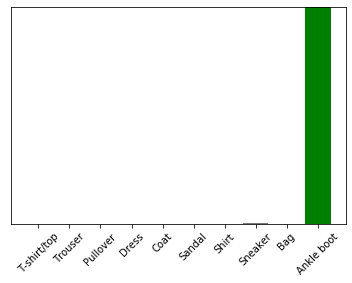

In [20]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [21]:
prediction_result = np.argmax(predictions_single[0])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
import cv2
imga = cv2.imread('img/coat02.jpg')
imgz = np.invert(imga)
imgb = cv2.resize(imgz, (28, 28))
imgc = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
#imgc = imgb
imgd = imgc.reshape((-1,28, 28))
imgd = imgd / 255

In [58]:
imgb.shape

(28, 28, 3)

In [61]:
testpredictions = model.predict(imgd)
np.argmax(testpredictions)

3

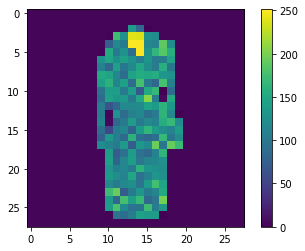

In [60]:
plt.figure()
plt.imshow(imgc)
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.


In [158]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [134]:
import PIL

In [46]:
from PIL import Image
# load the image
image = Image.open('img/bag01.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(1921, 1442)


uint8
(1442, 1921, 3)


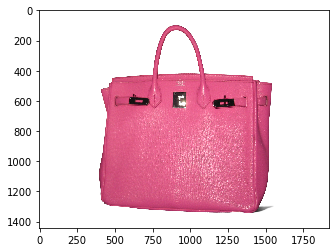

In [48]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('img/bag01.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [49]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('img/bag01.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(1442, 1921, 3)
None
RGB
(1921, 1442)


In [52]:
from PIL import Image
# load the image
image = Image.open('img/bag01.jpg')
# report the size of the image
print(image.size)
# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))
# report the size of the thumbnail
print(image.size)

(1921, 1442)
(100, 75)


In [54]:
from PIL import Image
# load the image
image = Image.open('img/bag01.jpg')
# report the size of the image
print(image.size)
# resize image and ignore original aspect ratio
img_resized = image.resize((200,200))
# report the size of the thumbnail
print(img_resized.size)

(1921, 1442)
(200, 200)


In [55]:
from PIL import Image
# load the image
image = Image.open('img/bag01.jpg')
# report the size of the image
print(image.size)
# resize image and ignore original aspect ratio
img_resized = image.resize((28,28))
# report the size of the thumbnail
print(img_resized.size)

(1921, 1442)
(28, 28)


In [56]:
img_resized

In [58]:
img_resized

In [59]:
type(img_resized)

PIL.Image.Image

In [60]:
img_resized_bw = img_resized.convert('1')

In [61]:
img_resized_bw

In [66]:
np.array(img_resized).reshape(28,28,1)

ValueError: cannot reshape array of size 2352 into shape (28,28,1)